In [4]:
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import numpy as np
from temgymbasic.utils import calculate_phi_0
import matplotlib.pyplot as plt


In [5]:

n_rays = 10000
wavelength = 0.01
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)

size = 512
det_shape = (size, size)
pixel_size = 0.005
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

lens_dist = 1
focal = 0.7
prop_dist = 1

components = (
    comp.PointBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        semi_angle=0.3,
    ),
    comp.Lens(
        z = lens_dist,
        f = focal,
    ),
    comp.AccumulatingDetector(
        z = lens_dist + prop_dist,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='ray'
    ),
)

model = Model(components)

rays = tuple(model.run_iter(num_rays=n_rays, random = False))

image = model.detector.get_image(rays[-1])

ValueError: cupy.ndaray cannot be specified as `repeats` argument.

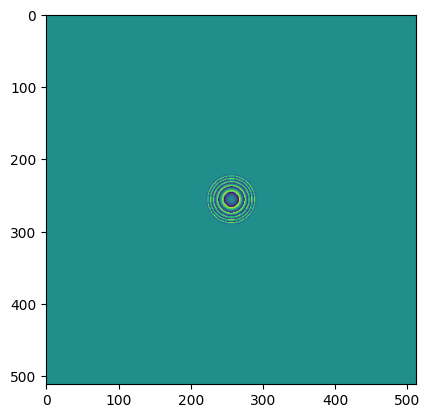

In [6]:
plt.figure()
plt.imshow(np.angle(image))
